In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open('data/dataset_for_Jacob.pkl', 'rb') as f:
    data = pickle.load(f)

The data is a list of 10000 simulations where each list entry has the following elements:
- observation_times
    - Times at which observations were made (30s intervals).
- ep_sep_obs_noisy
    - Noisy observations of the EP separation vector (Ntimes,3).
- MS2_signal_noisy
    - Noisy observations of the MS2 signal (Ntimes,1).  
- state_times
    - Times at which the promoter state changed (including the first promoter state at t=0).
- state_sequence
    - Promoter state at the state_times (same at all future times up to the next state_time element).
- ep_sep_obs
    - Noiseless values of the EP separation vector (Ntimes,3).
- thinned_on_times
    - Times at which the promoter went to the on-state (thinned from on_times by looking at whether polymer was in contact at the time).
- on_times
    - Times at which the promoter could have gone to the on-state (essentially events at rate kon).
- pol2_loading_events
    - Times at which the polymerases were loaded (Nloading_events).

Below is a plto which hopefully demonstrates what the dfferent entries are

State times: (13,)
Padded times: (14,)
Padded states: (14,)
observation_times: (601,)
MS2_signal_noisy: (601,)
ep_sep_obs_noisy: (3, 601)
pol2_loading_events: (121,)


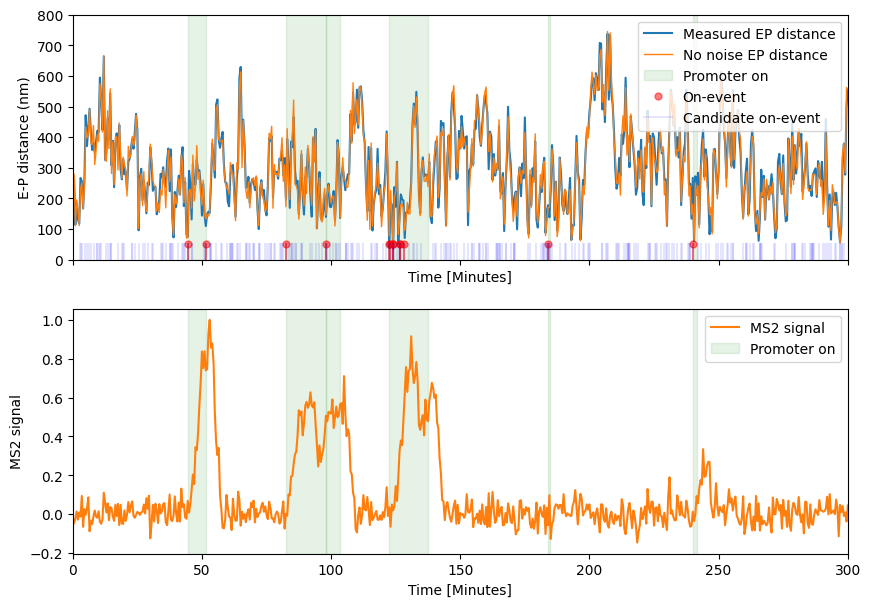

In [25]:
index = np.random.randint(0, len(data))
(observation_times,
 ep_sep_obs_noisy,
 MS2_signal_noisy,
 state_times,
 state_sequence,
 ep_sep_obs,
 thinned_on_times,
 on_times,
 pol2_loading_events) = data[index]

MS2_signal_noisy = MS2_signal_noisy / np.max(MS2_signal_noisy)

padded_times = np.append(state_times, np.max(observation_times))
padded_states = np.append(state_sequence, state_sequence[-1])

padded_pol2_loading_events = np.append(pol2_loading_events, np.max(observation_times))


print("State times:", state_times.shape)
print("Padded times:", padded_times.shape)
print("Padded states:", padded_states.shape)
print('observation_times:', observation_times.shape)
print('MS2_signal_noisy:', MS2_signal_noisy.shape)
print('ep_sep_obs_noisy:', ep_sep_obs_noisy.shape)
print('pol2_loading_events:', pol2_loading_events.shape)


fig, axes = plt.subplots(2, 1, figsize=(10, 7), sharex=True)
ax, ax2 = axes
# ax.plot(observation_times, np.linalg.norm(ep_sep_obs, axis=0), label="True")
ax.plot(
    observation_times / 60,
    np.linalg.norm(ep_sep_obs_noisy, axis=0),
    label="Measured EP distance",
)  # , "o", label="Noisy")
ax.plot(
    observation_times / 60,
    np.linalg.norm(ep_sep_obs, axis=0),
    label="No noise EP distance", lw=1
)  # , "o", label="Noisy")
ax2.plot(observation_times / 60, MS2_signal_noisy, color="C1", label="MS2 signal")

count = 0
for i in range(len(state_sequence)):
    if padded_states[i] == 0:  # off state
        # ax.axvspan(padded_times[i], padded_times[i + 1], color="red", alpha=0.1)
        # ax2.axvspan(padded_times[i], padded_times[i + 1], color="red", alpha=0.1)
        pass
    else:  # on state
        if count == 0:
            ax.axvspan(
                padded_times[i] / 60,
                padded_times[i + 1] / 60,
                color="green",
                alpha=0.1,
                label="Promoter on",
            )
            ax2.axvspan(
                padded_times[i] / 60,
                padded_times[i + 1] / 60,
                color="green",
                alpha=0.1,
                label="Promoter on",
            )
        else:
            ax.axvspan(
                padded_times[i] / 60, padded_times[i + 1] / 60, color="green", alpha=0.1
            )
            ax2.axvspan(
                padded_times[i] / 60, padded_times[i + 1] / 60, color="green", alpha=0.1
            )
        count += 1
for n, t in enumerate(thinned_on_times):
    if n == 0:
        ax.plot([t / 60, t / 60], [0, 100 / 2], color="red", alpha=0.5)
        ax.plot([t / 60], [100 / 2], "ro", markersize=5, alpha=0.5, label="On-event")
    else:
        ax.plot([t / 60, t / 60], [0, 100 / 2], color="red", alpha=0.5)
        ax.plot([t / 60], [100 / 2], "ro", markersize=5, alpha=0.5)
for n, t in enumerate(on_times):
    if n == 0:
        ax.plot(
            [t / 60, t / 60],
            [0, 100 / 2],
            color="blue",
            alpha=0.1,
            label="Candidate on-event",
        )

    else:
        ax.plot([t / 60, t / 60], [0, 100 / 2], color="blue", alpha=0.1)
ax.set(
    xlabel="Time [Minutes]",
    ylabel="E-P distance (nm)",
    ylim=(0, 800),
    xlim=(0, np.max(observation_times) / 60),
)
ax.legend(loc="upper right")
ax2.set(
    xlabel="Time [Minutes]",
    ylabel="MS2 signal",
    xlim=(0, np.max(observation_times) / 60),
)
ax2.legend(loc="upper right")


In [20]:
observation_times, 
converted_padded_times = 30 * np.round(padded_times/30)

fulltime_padded_states = np.zeros_like(observation_times)
for i in range(len(converted_padded_times)-1):
    start_time = converted_padded_times[i]
    end_time = converted_padded_times[i + 1]
    mask = (observation_times >= start_time) & (observation_times < end_time)
    fulltime_padded_states[mask] = padded_states[i]

fulltime_padded_states
pickle.dump(fulltime_padded_states, open("data/dataset_for_Jacob_fulltime_padded_states.pkl", "wb"))

86


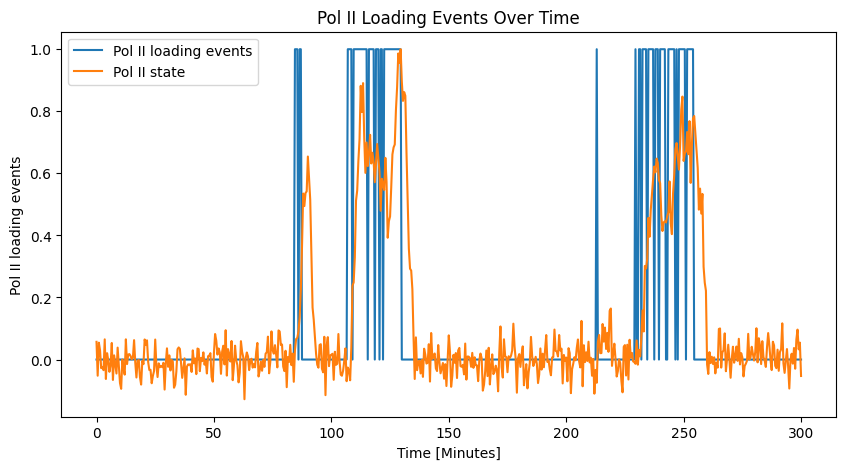

In [ ]:
observation_times, 
converted_padded_times = 30 * np.round(padded_pol2_loading_events/30)

fulltime_padded_pol2_loading_events = np.zeros_like(observation_times)
for i in range(len(converted_padded_times)-1):
    start_time = converted_padded_times[i]
    mask = observation_times == start_time
    fulltime_padded_pol2_loading_events[mask] = 

fulltime_padded_pol2_loading_events

print(sum(fulltime_padded_pol2_loading_events))

plt.figure(figsize=(10, 5))
plt.plot(observation_times / 60, fulltime_padded_pol2_loading_events, label="Pol II loading events")
plt.plot(observation_times / 60, MS2_signal_noisy, label="Pol II state")
plt.xlabel("Time [Minutes]")
plt.ylabel("Pol II loading events")
plt.title("Pol II Loading Events Over Time")
plt.legend()


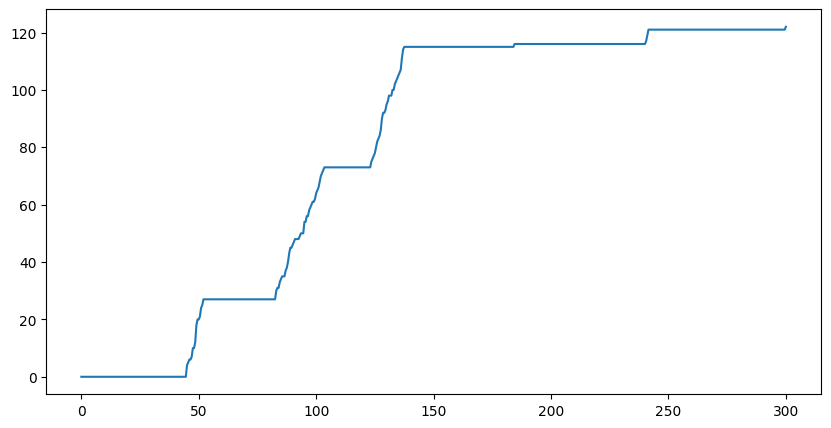

In [28]:
padded_pol2_loading_events.shape

events = []
for i, t in enumerate(observation_times):
    num_events = np.sum(padded_pol2_loading_events <= t)
    events.append(num_events)

plt.figure(figsize=(10, 5))
plt.plot(observation_times / 60, events, label="Pol II loading events")